In [1]:
import tensorflow as tf
import numpy as np

In [2]:
dataset = tf.keras.datasets.mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = dataset
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [3]:
print(X_train.shape)

(55000, 28, 28)


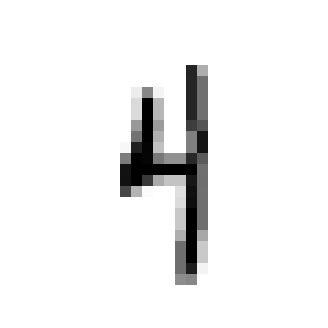

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.imshow(X_test[65], cmap="binary")
plt.axis("off")
plt.show()

In [ ]:
encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="selu"),
    tf.keras.layers.Dense(30, activation="selu"),
])
decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="selu", input_shape=[30]),
    tf.keras.layers.Dense(28*28, activation="sigmoid"),
    tf.keras.layers.Reshape([28,28])    
])
ae = tf.keras.Sequential([encoder, decoder])
ae.compile(optimizer="Adam", loss="mse", metrics=['mae'])

c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0424 - mae: 0.1066 - val_loss: 0.0183 - val_mae: 0.0522
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0176 - mae: 0.0507 - val_loss: 0.0150 - val_mae: 0.0451
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0144 - mae: 0.0436 - val_loss: 0.0132 - val_mae: 0.0409
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0128 - mae: 0.0400 - val_loss: 0.0120 - val_mae: 0.0382
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0118 - mae: 0.0378 - val_loss: 0.0113 - val_mae: 0.0368


In [ ]:
history = ae.fit(X_train, X_train, epochs=5, validation_data=(X_valid, X_valid))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0111 - mae: 0.0360


{'loss': 0.010753250680863857, 'mae': 0.035304803401231766}

In [12]:
ae.evaluate(X_test, X_test, return_dict=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0113 - mae: 0.0367


{'loss': 0.010985600762069225, 'mae': 0.03596225380897522}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


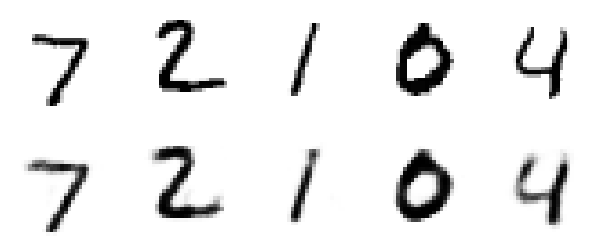

In [18]:
import matplotlib.pyplot as plt

def plot_reconstructions(model, images=X_test, n_images=5):
    reconstructions = np.clip(model.predict(images[:n_images]), 0, 1)
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plt.imshow(images[image_index], cmap="binary")
        plt.axis("off")
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plt.imshow(reconstructions[image_index], cmap="binary")
        plt.axis("off")
plot_reconstructions(ae)

In [13]:
ae.save('ae_stacked.keras')

In [ ]:
encoder_cnn = tf.keras.Sequential([
    tf.keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    tf.keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
])

decoder_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding= "VALID", activation="selu", input_shape=[3, 3, 64]),
    tf.keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding= "SAME", activation="selu"),
    tf.keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding= "SAME", activation="sigmoid"),
    tf.keras.layers.Reshape([28,28]),
])

ae_cnn = tf.keras.Sequential([encoder_cnn, decoder_cnn])
ae_cnn.compile(optimizer="Adam", loss="mse", metrics=['mae'])

c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv_transpose.py:94: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [15]:
history = ae_cnn.fit(X_train, X_train, epochs=5, validation_data=(X_valid, X_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 0.0511 - mae: 0.0991 - val_loss: 0.0071 - val_mae: 0.0279
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0064 - mae: 0.0261 - val_loss: 0.0052 - val_mae: 0.0230
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0048 - mae: 0.0223 - val_loss: 0.0042 - val_mae: 0.0207
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0040 - mae: 0.0202 - val_loss: 0.0037 - val_mae: 0.0194
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0035 - mae: 0.0188 - val_loss: 0.0034 - val_mae: 0.0187


In [16]:
ae_cnn.evaluate(X_test, X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0033 - mae: 0.0183


[0.0032395743764936924, 0.018310267478227615]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


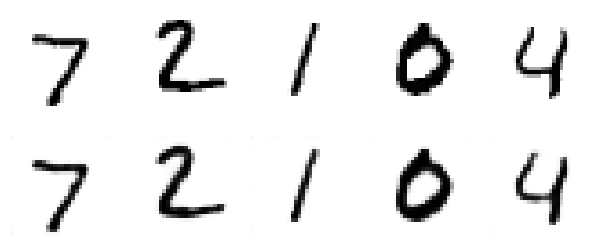

In [19]:
plot_reconstructions(ae_cnn)
plt.show()

In [20]:
ae_cnn.save('ae_conv.keras')

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


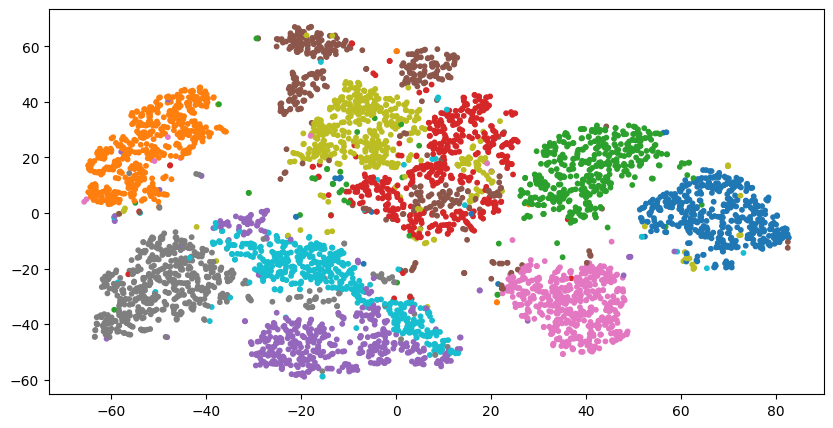

In [21]:
from sklearn.manifold import TSNE

X_valid_compressed = encoder_cnn.predict(X_valid)
X_valid_compressed_flat = X_valid_compressed.reshape((X_valid_compressed.shape[0], -1))

tsne = TSNE(init="pca", learning_rate="auto", random_state=42)
X_valid_2D = tsne.fit_transform(X_valid_compressed_flat)

plt.figure(figsize=(10, 5))
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap="tab10")
plt.show()

In [23]:
tsne.get_params()

{'angle': 0.5,
 'early_exaggeration': 12.0,
 'init': 'pca',
 'learning_rate': 'auto',
 'max_iter': None,
 'method': 'barnes_hut',
 'metric': 'euclidean',
 'metric_params': None,
 'min_grad_norm': 1e-07,
 'n_components': 2,
 'n_iter': 'deprecated',
 'n_iter_without_progress': 300,
 'n_jobs': None,
 'perplexity': 30.0,
 'random_state': 42,
 'verbose': 0}

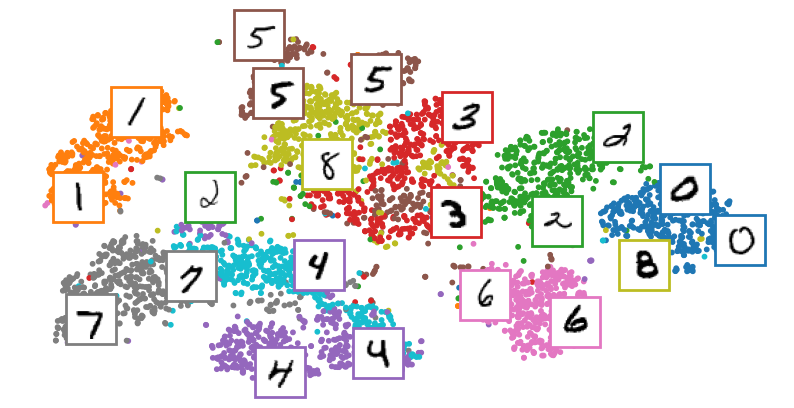

In [24]:
import matplotlib as mpl

plt.figure(figsize=(10, 5))
cmap = plt.cm.tab10
Z = X_valid_2D
Z = (Z - Z.min()) / (Z.max() - Z.min())
plt.scatter(Z[:, 0], Z[:, 1], c=y_valid, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(Z):
    dist = ((position - image_positions) ** 2).sum(axis=1)
    if dist.min() > 0.02:
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_valid[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_valid[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
plt.show()

In [ ]:
dropout_encoder = tf.keras.Sequential([
    tf.keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
])

dropout_decoder = tf.keras.Sequential([
    tf.keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding= "VALID", activation="selu", input_shape=[3, 3, 64]),
    tf.keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding= "SAME", activation="selu"),
    tf.keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding= "SAME", activation="sigmoid"),
    tf.keras.layers.Reshape([28,28]),
])

dropout_ae = tf.keras.Sequential([dropout_encoder, dropout_decoder])
dropout_ae.compile(optimizer="Adam", loss="mse", metrics=['mae'])

c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv_transpose.py:94: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 0.0433 - mae: 0.0988 - val_loss: 0.0647 - val_mae: 0.0993
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0108 - mae: 0.0355 - val_loss: 0.0625 - val_mae: 0.0973
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0094 - mae: 0.0324 - val_loss: 0.0604 - val_mae: 0.0956
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0087 - mae: 0.0308 - val_loss: 0.0631 - val_mae: 0.0975
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0083 - mae: 0.0299 - val_loss: 0.0647 - val_mae: 0.0988
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


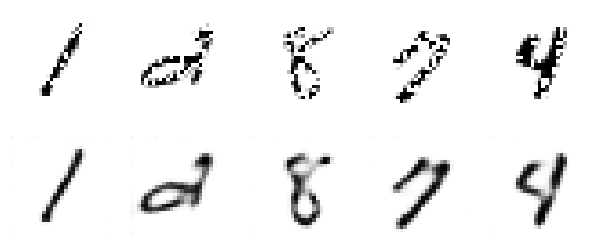

In [37]:
history = dropout_ae.fit(X_train, X_train, epochs=5, validation_data=(X_valid, X_valid))

dropout = tf.keras.layers.Dropout(0.3)
plot_reconstructions(dropout_ae, dropout(X_valid, training=True))

dropout_ae.save('ae_denoise.keras')

In [ ]:
dropout_encoder_gaussian = tf.keras.Sequential([
    tf.keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    tf.keras.layers.GaussianNoise(stddev=0.7),
    tf.keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
])

dropout_ae_gau = tf.keras.Sequential([dropout_encoder_gaussian, dropout_decoder])
dropout_ae_gau.compile(optimizer="Adam", loss="mse", metrics=['mae'])

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 0.0398 - mae: 0.0956 - val_loss: 0.0128 - val_mae: 0.0461
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0247 - mae: 0.0658 - val_loss: 0.0104 - val_mae: 0.0402
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0232 - mae: 0.0626 - val_loss: 0.0099 - val_mae: 0.0383
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0224 - mae: 0.0611 - val_loss: 0.0098 - val_mae: 0.0382
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0219 - mae: 0.0601 - val_loss: 0.0097 - val_mae: 0.0373
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


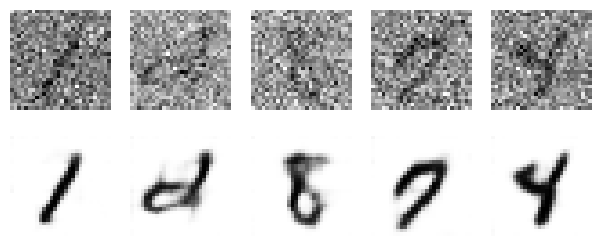

In [41]:
history = dropout_ae_gau.fit(X_train, X_train, epochs=5, validation_data=(X_valid, X_valid))

gaussian = tf.keras.layers.GaussianNoise(stddev=0.7) 
plot_reconstructions(dropout_ae_gau, gaussian(X_valid, training=True))

In [42]:
cifar10 = tf.keras.datasets.cifar10.load_data()
(X_train_full, y_train), (_, _) = cifar10
X_train_full = X_train_full.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 321s 2us/step


In [91]:
print(X_train[0].shape)

(32, 32, 3)


In [92]:
encoder_color = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = [32, 32, 3]),
    tf.keras.layers.GaussianNoise(stddev=0.3),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="selu", padding="SAME"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid"),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="selu", padding="SAME"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="selu", padding="SAME"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid"),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="selu", padding="SAME"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid"),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="selu", padding="SAME"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid"),
])

decoder_color = tf.keras.Sequential([ 
    tf.keras.layers.Conv2DTranspose(256, kernel_size=3, strides=2, padding= "SAME", activation="selu", input_shape=[1, 1, 256]), # (2-1) * 2 + 3 = 5
    tf.keras.layers.Conv2DTranspose(128, kernel_size=3, strides=2, padding= "SAME", activation="selu"), # (2-1) * 2 + 3 = 5
    tf.keras.layers.Conv2DTranspose(64, kernel_size=3, strides=2, padding= "SAME", activation="selu",), # (5-1) * 2 + 3 = 11 
    tf.keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding= "SAME", activation="selu",), # (11-1) * 2 + 3 = 23
    tf.keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding= "SAME", activation="selu",), # 23 * 2 = 46
    tf.keras.layers.Conv2DTranspose(3, kernel_size=3, strides=1, padding= "SAME", activation="sigmoid",), # 46 * 1 = 46
    tf.keras.layers.Reshape([32, 32, 3]),
])

c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv_transpose.py:94: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [93]:
color = tf.keras.Sequential([encoder_color, decoder_color])
color.compile(loss="mae", optimizer="Adam", metrics=["mae"])

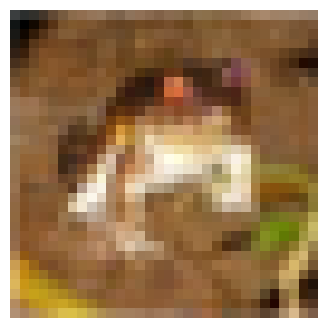

In [94]:
plt.figure(figsize=(4, 4))
plt.imshow(X_train[0])
plt.axis("off")
plt.show()

In [95]:
history = color.fit(X_train, X_train, validation_data=(X_valid, X_valid), epochs=5)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - loss: 0.1146 - mae: 0.1146 - val_loss: 0.2561 - val_mae: 0.2561
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 44s 31ms/step - loss: 0.0844 - mae: 0.0844 - val_loss: 0.1898 - val_mae: 0.1898
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - loss: 0.0794 - mae: 0.0794 - val_loss: 0.1571 - val_mae: 0.1571
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - loss: 0.0763 - mae: 0.0763 - val_loss: 0.1221 - val_mae: 0.1221
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 43s 31ms/step - loss: 0.0744 - mae: 0.0744 - val_loss: 0.0938 - val_mae: 0.0938


In [96]:
encoder_color = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = [32, 32, 3]),
    tf.keras.layers.GaussianNoise(stddev=0.3),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="selu", padding="SAME"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid"),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="selu", padding="SAME"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="selu", padding="SAME"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid"),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="selu", padding="SAME"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid"),
])

decoder_color = tf.keras.Sequential([ 
    tf.keras.layers.Conv2DTranspose(128, kernel_size=3, strides=2, padding= "SAME", activation="selu", input_shape=[2, 2, 128]), # (2-1) * 2 + 3 = 5
    tf.keras.layers.Conv2DTranspose(64, kernel_size=3, strides=2, padding= "SAME", activation="selu",), # (5-1) * 2 + 3 = 11 
    tf.keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding= "SAME", activation="selu",), # (11-1) * 2 + 3 = 23
    tf.keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding= "SAME", activation="selu",), # 23 * 2 = 46
    tf.keras.layers.Conv2DTranspose(3, kernel_size=3, strides=1, padding= "SAME", activation="sigmoid",), # 46 * 1 = 46
    tf.keras.layers.Reshape([32, 32, 3]),
])

In [97]:
color_less = tf.keras.Sequential([encoder_color, decoder_color])
color_less.compile(loss="mae", optimizer="Adam", metrics=["mae"])

In [98]:
history = color_less.fit(X_train, X_train, validation_data=(X_valid, X_valid), epochs=5)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - loss: 0.1057 - mae: 0.1057 - val_loss: 0.2807 - val_mae: 0.2807
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - loss: 0.0769 - mae: 0.0769 - val_loss: 0.1772 - val_mae: 0.1772
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - loss: 0.0723 - mae: 0.0723 - val_loss: 0.1390 - val_mae: 0.1390
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - loss: 0.0703 - mae: 0.0703 - val_loss: 0.1017 - val_mae: 0.1017
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - loss: 0.0687 - mae: 0.0687 - val_loss: 0.0880 - val_mae: 0.0880


In [99]:
encoder_color = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = [32, 32, 3]),
    tf.keras.layers.GaussianNoise(stddev=0.3),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="selu", padding="SAME"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid"),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="selu", padding="SAME"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="selu", padding="SAME"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid"),
])

decoder_color = tf.keras.Sequential([ 
    tf.keras.layers.Conv2DTranspose(64, kernel_size=3, strides=2, padding= "SAME", activation="selu", input_shape=[4, 4, 64]), # (2-1) * 2 + 3 = 5
    tf.keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding= "SAME", activation="selu",), # (11-1) * 2 + 3 = 23
    tf.keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding= "SAME", activation="selu",), # 23 * 2 = 46
    tf.keras.layers.Conv2DTranspose(3, kernel_size=3, strides=1, padding= "SAME", activation="sigmoid",), # 46 * 1 = 46
    tf.keras.layers.Reshape([32, 32, 3]),
])

In [100]:
color_more_less = tf.keras.Sequential([encoder_color, decoder_color])
color_more_less.compile(loss="mae", optimizer="Adam", metrics=["mae"])

In [101]:
history = color_more_less.fit(X_train, X_train, validation_data=(X_valid, X_valid), epochs=5)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - loss: 0.0961 - mae: 0.0961 - val_loss: 0.1175 - val_mae: 0.1175
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - loss: 0.0725 - mae: 0.0725 - val_loss: 0.0868 - val_mae: 0.0868
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - loss: 0.0696 - mae: 0.0696 - val_loss: 0.0757 - val_mae: 0.0757
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - loss: 0.0681 - mae: 0.0681 - val_loss: 0.0686 - val_mae: 0.0686
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - loss: 0.0670 - mae: 0.0670 - val_loss: 0.0682 - val_mae: 0.0682


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6790284..1.5598118].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6558266..1.6913145].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.72119164..1.8419702].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.7638208..1.753833].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.7715406..1.759454].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.92193973..1.7544924].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.745139

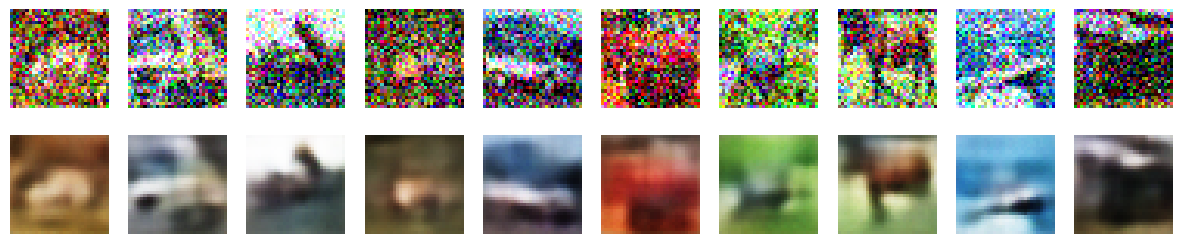

In [102]:
gaussian = tf.keras.layers.GaussianNoise(stddev=0.3) 

plot_reconstructions(color, gaussian(X_train, training=True), n_images=10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.7994293..1.8744582].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9056..1.772403].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.62668425..2.0095592].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.775797..1.6771493].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8638612..1.7240577].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9618956..1.8391266].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6930204..1

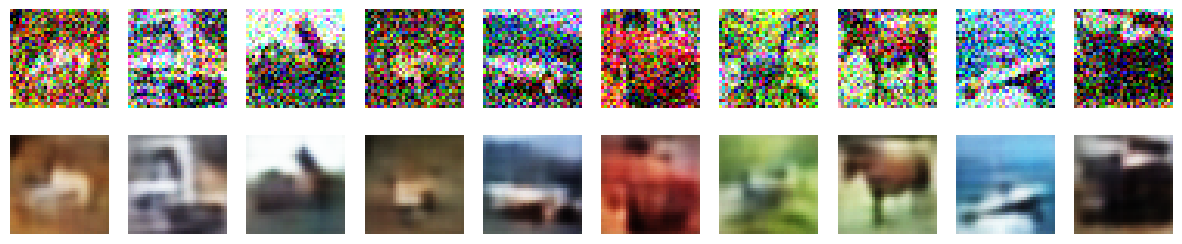

In [103]:
plot_reconstructions(color_less, gaussian(X_train, training=True), n_images=10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8820214..1.7864861].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.7012846..1.7085669].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.69140476..1.841124].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.68668056..1.5594196].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9074329..1.6577933].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.83841896..1.681525].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.94386

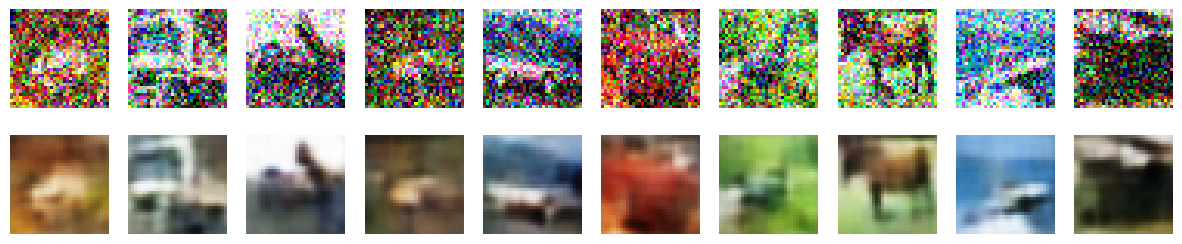

In [104]:
plot_reconstructions(color_more_less, gaussian(X_train, training=True), n_images=10)

In [ ]:
#szczerze nwm ocb